In [5]:
from feature_tester import *

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [7]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [8]:
ft = FeatureTester(data,test_size=0.2, random_seed=42, cv=5, precision=3)

In [9]:
ft.set_y('SalePrice')

In [10]:
ft.add_estimator(LinearRegression(),'Linear')
ft.add_estimator(RandomForestRegressor(50),'Forest')

In [11]:
ft.add_feature('LotArea')
ft.add_feature('LotFrontage','numerical',0)
ft.add_feature('LotShape','ordinal',{'Reg':1,'IR1':2,'IR2':3,'IR3':3})
ft.add_feature('MSZoning','categorical')

In [12]:
ft.fit()

array([['Linear', '0.189'],
       ['Forest', '0.243']], dtype='<U32')

In [13]:
X,y = ft.build_data()

In [14]:
X_test = ft.build_data(data=test)

In [15]:
X,y = ft.build_data(skip='LotArea')

In [16]:
ft.col_names

['LotArea', 'LotFrontage', 'LotShape', 'FV', 'RH', 'RL', 'RM']

In [17]:
ft.find_column_number('RL')

5

In [18]:
ft.modify_feature('LotFrontage','numerical','mean')

array([['Linear', '0.185', '0.036'],
       ['Forest', '0.253', '0.147']], dtype='<U32')

In [19]:
ft.fit()

array([['Linear', '0.185', '0.0'],
       ['Forest', '0.266', '0.013']], dtype='<U32')

In [20]:
ft.predict(test)

array([[169765.48960389, 183217.48866139, 198179.60834891, ...,
        171182.27724309, 173502.25535395, 179460.32818907],
       [178193.07142857, 161217.86115219, 224168.24666667, ...,
        217969.34177778, 142739.5       , 156294.5       ]])

In [21]:
ft.print_features('numerical')

['LotArea', 'LotFrontage']

In [22]:
ft.print_features('numerical',True)

[('LotArea', 'numerical'), ('LotFrontage', 'numerical', 'mean')]

In [23]:
ft.remove_feature('LotFrontage')

In [24]:
ft.sanity_check()

Note, there are features in the dataset that were not tested
['Id', 'MSSubClass', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea

In [25]:
ft.score_all_features()

LotArea
[['Linear' '0.016']
 ['Forest' '0.006']]
LotShape
[['Linear' '0.031']
 ['Forest' '0.099']]
MSZoning
[['Linear' '0.063']
 ['Forest' '0.086']]


In [26]:
ft.score_feature('LotArea')

array([['Linear', '0.149', '0.016'],
       ['Forest', '0.123', '-0.001']], dtype='<U32')

In [27]:
ft.score_test_set()

array([['Linear', '0.206'],
       ['Forest', '0.207']], dtype='<U32')

In [28]:
ft.restore_feature('LotFrontage','numerical','mean')

array([['Linear', '0.185', '0.036'],
       ['Forest', '0.259', '0.142']], dtype='<U32')

In [29]:
ft.score_test_set(skip='LotArea')

array([['Linear', '0.267'],
       ['Forest', '0.299']], dtype='<U32')

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64


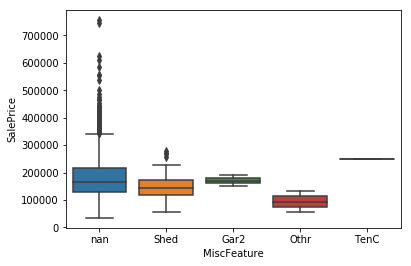

In [30]:
observe_feature(data,'MiscFeature','SalePrice')

In [31]:
get_dict(data,'MiscFeature')

{nan: 0, 'Shed': 0, 'Gar2': 0, 'Othr': 0, 'TenC': 0}

In [32]:
get_list(data,'MiscFeature')

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

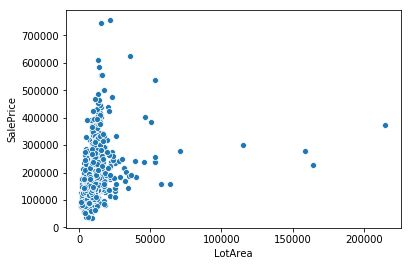

In [33]:
observe_feature(data,'LotArea','SalePrice')